<a href="https://colab.research.google.com/github/luisafmazuera/Analitica-de-negocios--Proyecto-final/blob/main/Proyecto_Final_Balanza_de_Pagos_Alemania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO FINAL ANALÍTICA DE NEGOCIOS - BALANZA DE PAGOS DE ALEMANIA 2019 A 2022**


Hecho por: Ana María Sáenz Botero, Salomé Ramírez Buelvas, y Luisa Fernanda Mazuera Cabrera.

0. Instalación de los paquetes para el Análisis de Sentimientos. En donde la pregunta de Análisis es ¿Cómo se comportó la economía de Alemania según sus balanzas de pagos desde el año 2019 hasta el 2022?

In [ ]:
!pip install -U spacy  #Es el tokenizador Análisis de Sentimientos
!spacy download es_core_news_lg  #Diccionario en Español
!spacy download en_core_web_sm  #Diccionario en Ingles

!pip install vaderSentiment
!pip install wordcloud

!pip uninstall numpy
!pip install numpy==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 847.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's

1. Se cargan las librerías de trabajo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

#Para cargar los archivos automáticamente del drivefrom google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt') #Optimizador de la maquina
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #Analizador de sentimientos
from nltk.tokenize import word_tokenize,sent_tokenize  #Tokenizador de oraciones

from textblob import TextBlob #Traductor de textos

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2. Se cargan los documentos de análisis.

In [ ]:
#Se procede con la lectura de los documentos:

#Para 2019:
nxl1=open('/content/drive/MyDrive/Analítica de Negocios/Proyecto Final/German balance of payments 2019.txt').read()
nxl_tk1=sent_tokenize(nxl1)
print(nxl_tk1[:5])

#Para 2020:
nxl2=open('/content/drive/MyDrive/Analítica de Negocios/Proyecto Final/German balance of payments 2020.txt').read()
nxl_tk2=sent_tokenize(nxl2)
print(nxl_tk2[:5])

#Para 2021:
nxl3=open('/content/drive/MyDrive/Analítica de Negocios/Proyecto Final/German balance of payments 2021.txt').read()
nxl_tk3=sent_tokenize(nxl3)
print(nxl_tk3[:5])

#Para 2022:
nxl4=open('/content/drive/MyDrive/Analítica de Negocios/Proyecto Final/German balance of payments 2022.txt').read()
nxl_tk4=sent_tokenize(nxl4)
nxl_tk4[:5]

['\ufeffDeutsche Bundesbank \nMonthly Report \nMarch 2020 \n17\nGerman balance of payments in 2019 \nIn 2019, the German economy’s current account surplus decreased by ¼ percentage point to  7¼% of nominal gross domestic product (GDP).', 'As in previous years, this was caused by a drop  in the goods trade surplus.', 'Very sluggish global trade growth and composition effects left a  visible dent in Germany’s exports, whereas imports of goods saw relatively steep growth in spite  of the industrial downturn.', 'Meanwhile, cheaper import prices, particularly for crude oil, made a  positive contribution to the foreign trade balance.', 'Moreover, the increase in the primary income  surplus – attributable to Germany’s higher net external assets – boosted the surplus.']
['\ufeffDeutsche Bundesbank \nMonthly Report \nMarch 2021 \n17\nGerman balance of payments in 2020 \nIn 2020, during the coronavirus pandemic, the German economy’s current account surplus  decreased by ½ percentage point to 7% 

['\ufeffDeutsche Bundesbank \nMonthly Report \nMarch 2023 \n21\nGerman balance of payments in 2022 \nIn 2022, the German economy’s current account surplus decreased by 3½ percentage points to  4¼% of nominal gross domestic product (GDP).',
 'This represents the largest decline since German  reunification and the lowest figure for the balance since 2003.',
 'The main driver of this was the  considerable decline in the surplus on the goods account, which was a result of the massive  deterioration in the terms of trade.',
 'This was caused by the sharp rises in the prices of energy and  other imported commodities.',
 'The German services account likewise deteriorated.']

3. Se procede con el análisis de sentimientos.

3.1. Para el año 2019:

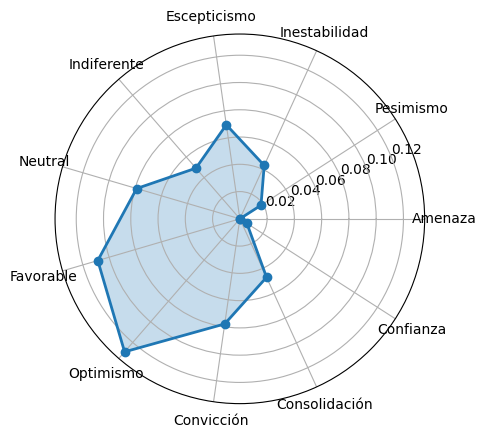

In [ ]:
#Traductor de Textos
from textblob import TextBlob
import textblob.exceptions
#import matplotlib.pyplot as plt

#Se cargan las librerias de análisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #diccionario 70 idiomas
sia=SentimentIntensityAnalyzer()

#----------------------------------------------------------------
#Se procede con el análisis de sentimientos de 2019 - nxl
#----------------------------------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]; pos1=[]

blob=TextBlob(nxl1)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk1=sent_tokenize(str(tblob))

for tokens in nxl_tk1:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC[pos]=nXC[pos]+1
  pos1.append(pos[0][0])

nXC=nXC/len(nxl_tk1)
nXC[5,]=(nXC[4,]+nXC[6,])/2

#Se crea el informe en un formato Excel - Contexto 2019
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol,pos1)))
dfm.to_excel('InformeAlemania_2019.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values,'o-',linewidth=2)
plt.fill(angles, values,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()


3.2. Para el año 2020:

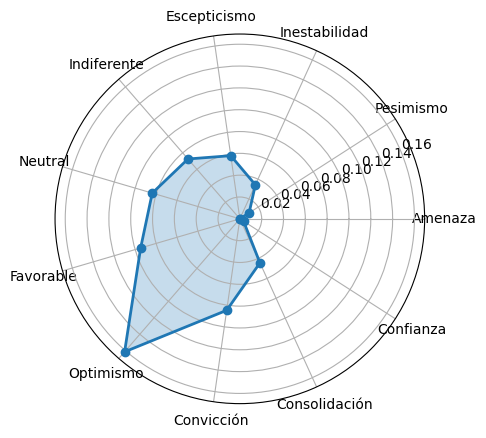

In [ ]:
#----------------------------------------------------------------
#Se procede con el análisis de sentimientos 2020 - nxl
#--------------------_-------------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC2=np.zeros((11,1))
Xtoks2=[];Xpol2=[]; pos1=[]

blob=TextBlob(nxl2)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk2=sent_tokenize(str(tblob))

for tokens2 in nxl_tk2:
  print(tokens2)
  scores=sia.polarity_scores(tokens2)
  print(scores)
  Xtoks2.append(tokens2)
  Xpol2.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC2[pos]=nXC2[pos]+1
  pos1.append(pos[0][0])

nXC2=nXC2/len(nxl_tk2)
nXC2[5,]=(nXC2[4,]+nXC2[6,])/2

#Se crea el informe en un formato Excel - Contexto 2020
dfm2=pd.DataFrame(np.column_stack((Xtoks2,Xpol2,pos1)))
dfm2.to_excel('InformeAlemania_2020.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values2,'o-',linewidth=2)
plt.fill(angles, values2,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()


3.3. Para el año 2021:

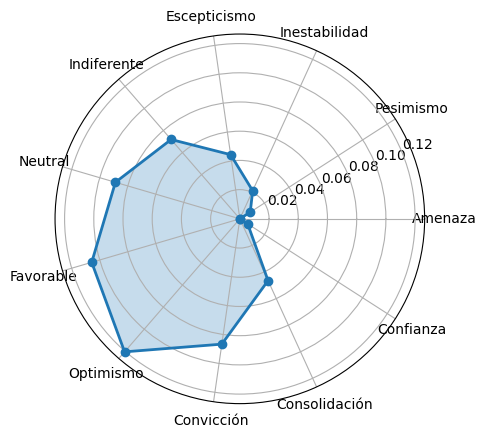

In [ ]:
#----------------------------------------------------------------
#Se procede con el análisis de sentimientos 2021 - nxl
#----------------------------------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC3=np.zeros((11,1))
Xtoks3=[];Xpol3=[]; pos1=[]

blob=TextBlob(nxl3)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk3=sent_tokenize(str(tblob))

for tokens3 in nxl_tk3:
  print(tokens3)
  scores=sia.polarity_scores(tokens3)
  print(scores)
  Xtoks3.append(tokens3)
  Xpol3.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC3[pos]=nXC3[pos]+1
  pos1.append(pos[0][0])

nXC3=nXC3/len(nxl_tk3)
nXC3[5,]=(nXC3[4,]+nXC3[6,])/2

#Se crea el informe en un formato Excel - Contexto 2021
dfm3=pd.DataFrame(np.column_stack((Xtoks3,Xpol3,pos1)))
dfm3.to_excel('InformeAlemania_2021.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values3=np.concatenate((nXC3,[nXC3[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values3,'o-',linewidth=2)
plt.fill(angles, values3,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()


3.4. Para el año 2022:

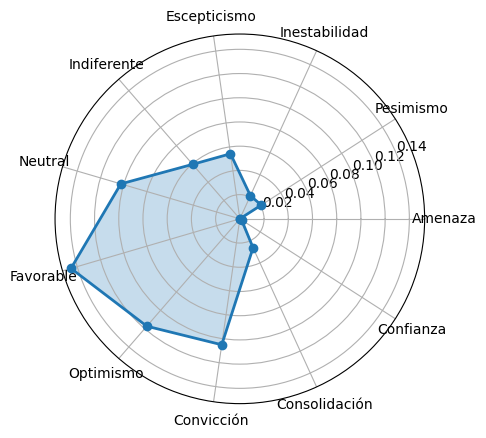

In [ ]:
#----------------------------------------------------------------
#Se procede con el análisis de sentimientos 2022 - nxl
#----------------------------------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC4=np.zeros((11,1))
Xtoks4=[];Xpol4=[]; pos1=[]

blob=TextBlob(nxl4)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk4=sent_tokenize(str(tblob))

for tokens4 in nxl_tk4:
  print(tokens4)
  scores=sia.polarity_scores(tokens4)
  print(scores)
  Xtoks4.append(tokens4)
  Xpol4.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC4[pos]=nXC4[pos]+1
  pos1.append(pos[0][0])

nXC4=nXC4/len(nxl_tk4)
nXC4[5,]=(nXC4[4,]+nXC4[6,])/2

#Se crea el informe en un formato Excel - Contexto 2022
dfm4=pd.DataFrame(np.column_stack((Xtoks4,Xpol4,pos1)))
dfm4.to_excel('InformeAlemania_2022.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values4=np.concatenate((nXC4,[nXC4[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values4,'o-',linewidth=2)
plt.fill(angles, values4,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()


3.5. Gráfico consolidado para los 4 años.

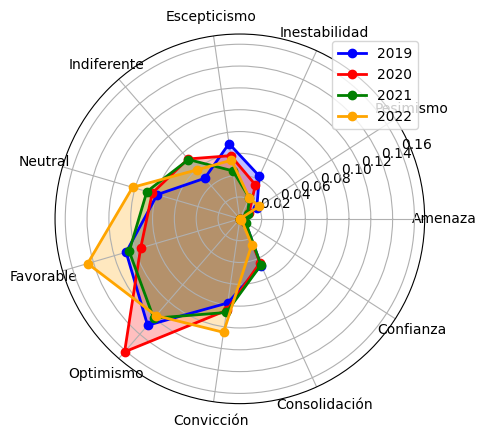

In [ ]:
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))
values3=np.concatenate((nXC3,[nXC3[0]]))
values4=np.concatenate((nXC4,[nXC4[0]]))
labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']


plt.polar(angles, values, 'o-', linewidth=2, color='blue')
plt.polar(angles, values2, 'o-', linewidth=2, color='red')
plt.polar(angles, values3, 'o-', linewidth=2, color='green')
plt.polar(angles, values4, 'o-', linewidth=2, color='orange')
plt.fill(angles, values, alpha=0.25, color='blue')
plt.fill(angles, values2, alpha=0.25, color='red')
plt.fill(angles, values3, alpha=0.25, color='green')
plt.fill(angles, values4, alpha=0.25, color='orange')
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.legend(['2019','2020','2021','2022'])
plt.show()

**Análisis de Resultados:**

Antes de comenzar, es de suma importancia resaltar que las gráficas proporcionadas por Power BI y Colab difieren de manera visual porque las escalas usadas para la graficación son diferentes. En el caso de Power BI, las escalas se adaptaron de formas diferentes para cada categoria para mostrar un resultado estéticamente mejor.

Luego de considerar este factor, es posible observar que durante los 4 años hubo un comportamiento que se mantuvo casi en su totalidad en el rango positivo de sentimientos, donde los sentimientos amenaza y confianza no presentaron registros considerables, siendo casi nulos para el rango de años seleccionado. En este sentido, se puede afirmar de forma general que la balanza de pagos alemana entre los años 2020-2023 tuvo un desempeño positivo. Ahora, refiriendonos a las demás categorías, las siguientes conclusiones fueron obtenidas:

* **Favorable:** En este sentimiento, es posible observar una variación mayor a comparación de las otras categorías. Durante el primer periodo evaluado, es decir, 2019, se denota un valor medianamente alto que decreció para el 2020 y creció de una forma medianamente constante para los dos siguientes periodos, demostrando la mejora del comportamiento de la balanza de pagos para estos últimos años.
* **Optimismo:** Se denota que si bien el 2019 tuvo un valor medianamente alto, el período siguiente tuvo un alto crecimiento que no duró mucho, pues para el 2021 y 20222 hubo un abrupto decrecimiento en este sentimiento.
* **Convicción:** Este sentimiento se mantuvo considerablemente estable, creciendo de 2019 a 2020 para después mantenerse estable en 2021. Finalmente, en el 2022, se volvió a generar un crecimiento, siendo un buen indicador de la balanza.
* **Consolidación:** En este caso, es posible notar que en términos generales se presentó un decrecimiento en valor, pues en los años 2019, 2020 y 2021 había una estabilidad casi total en los valores que representaban esta categoría, pero, para el año 2022 hubo una merma, afectando en cierto modo como se percibió la economía alemana en este sentido.
* **Neutral:** El sentimiento neutral tuvo un comportamiento de crecimiento escalonado a medida que pasaba cada año, el menor valor, entonces, fue para 2019 y el mayor para 2022, siendo este último un crecimiento mayor que el resto de periodos.
* **Pesimismo:** Los valores del sentimiento "pesimismo" se mantuvieron muy parecidos durante el periodo, pero se puede observar que para el 2019 este sentimiento tuvo un valor mayor que los demás, y para el 2022 un valor incluso mayor, resultando en una balanza que se percibe negativamente en el último año.
* **Inestabilidad:** El sentimiento de "Inestabilidad" tuvo un mayor valor para el año 2019, pero se fue contrayendo de forma progresiva a medida cambiaba de año, resultando en el menor valor para 2022.
* **Excepticismo:** Este sentimiento empezó en 2019 con el mayor valor, y se fue reduciendo para 2020 y 2021; finalmente, para 2022 el valor sobrepasó el del 2021, alcanzando casi el que se mostró durante 2020, demostrando un retroceso.
* **Indiferente:** Es posible observar que, en este caso, el primer período evaluado contó con el valor más bajo a comparación de los otros años, una buena señal en cuanto al comportamiento de la economía del país; sin embargo, para el 2020 se presentó un crecimiento que llevó a Alemania a su punto más alto en esta categoría, el cual se mantuvo estable en el 2021 y logró reducirse un poco para el 2022, sin llegar a ser igual o más bajo que el período inicial.